<a href="https://colab.research.google.com/github/mingshey/python_mechanics/blob/main/Python%ED%95%B4%EC%84%9D%EC%97%AD%ED%95%99_002_%EC%8B%9C%EB%AE%AC%EB%A0%88%EC%9D%B4%EC%85%98_%EA%B8%B0%EC%B4%88_%EA%B0%80%EC%86%8D%EB%8F%84%EA%B0%80_%EB%B3%80%ED%95%98%EB%8A%94_%EC%9A%B4%EB%8F%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analytical Mechanics with Python
# 파이썬으로 코딩하는 해석역학
## <Elective Tracks 2024 Summer Programme>

## 수치 모의 실험(simulation) 기초(2/3)


## 가속도가 변하는 운동

예) 용수철에 매달린 물체의 운동:

$F = - k x.$

$a = \dfrac{F}{m} = -\dfrac{k}{m} x.$ $\space\space\rightarrow$ 위치에 따라 가속도가 변한다.

시각 $t_n$ 일 때 물체의 상태를 $(x_n, v_n)$으로 나타내면, $a_n = -\dfrac{k}{m} x_n$이라 할 때, $t_{n+1} = t_n + \Delta t$ 일 때의 상태는

### i) 오일러 방법

$$\left\{\begin{align}
x_{n+1} &= x_{n} + v_n \cdot \Delta t\\
v_{n+1} &= v_{n} + a_{n} \cdot \Delta t
\end{align}\right.$$

또는

$$(x_{n+1}, v_{n+1}) = (x_{n}, v_{n}) + (v_{n}, a_{n}) \cdot \Delta t$$

이라고 할 수 있다.

여기서 $k_n \stackrel{\text{def}}{=} (v_n, a_n)$이라 하고, 시각 $t_n$, $t_{n+1}$ 일 때 물체의 상태(state)를 각각 $S_n \equiv (x_n, v_n)$, $S_{n+1} \equiv (x_{n+1}, v_{n+1})$라 하면

$$S_{n+1} = S_n + k_n \cdot \Delta t$$

와 같은 형식으로 쓸 수 있다.

여기서 $k_n$은 $\dfrac{S_{n+1}-S_{n}}{\Delta t}$이므로 $$k_n = \left.\dfrac{\Delta S}{\Delta t}\right|_{t_n},$$ 즉 시각 $t_n$일 때 물체의 __상태 변화율__이라 할 수 있다.

또한 $k_n$은 $x_n$과 $v_n$의 함수이므로 $k_n = f(S_n)$이라 할 수 있다. 즉 $$\left.\frac{\Delta S}{\Delta t}\right|_{t_n} = f(S_n)$$
이다.

물체의 상태 변화율은 시간에 따라 변하는 외력이 작용하는 경우에는 시간의 함수이기도 하므로, 일반적으로는
$$\left.\frac{\Delta S}{\Delta t}\right|_{t_n} = f(t_n, S_n)$$
의 형태로 나타난다.

용수철에 매달린 물체의 운동의 경우 구체적으로,

$S_n = (x_n, v_n),$

$k_n = f(S_n) = (v_n, -\dfrac{k}{m}x_n),$

$S_{n+1} = S_n + k_n \cdot \Delta t.$

즉

$$\begin{align}
\left(x_{n+1}, v_{n+1}\right) &=(x_n, v_n) + (v_n, -\dfrac{k}{m}x_n)\Delta t\\
&= \left(x_n + v_n \Delta t,\space v_n - \dfrac{k}{m}x_n \Delta t\right)
\end{align}$$

또는 $x$, $v$를 따로 쓰면,$$\left\{\begin{align}
x_{n+1} &= x_n + v_n \Delta t,\\
v_{n+1} &= v_n - \dfrac{k}{m}x_n \Delta t
\end{align}\right.$$
이다.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
"""
용수철에 매달린 물체의 운동
Euler method
"""
v0 = 0.0;
t0 = 0.0;
x0 = 1.0;
Delta_t = 0.01;
k = 2.0;
m = 0.5;

t = t0;
x = x0;
v = v0;

t_list = [t];
x_list = [x];
v_list = [v];

def f(t, S):
  """
  x와 v의 변화율을 구한다.
  """
  x, v = S
  a = -k/m * x
  return np.array([v, a])

def euler_step(dSdt, t, S, Delta_t):
  """
  오일러 방법에 따라 다음 상태를 구한다.
  """
  k1 = dSdt(t, S)
  S_next = S + k1 * Delta_t
  t_next = t + Delta_t
  return (t_next, S_next)


In [ ]:
S=np.array([x, v])

for n in range(1, 1201):
  t, S = euler_step(f, t, S, Delta_t)
  x, v = S

  t_list.append(t)
  x_list.append(x)
  v_list.append(v)

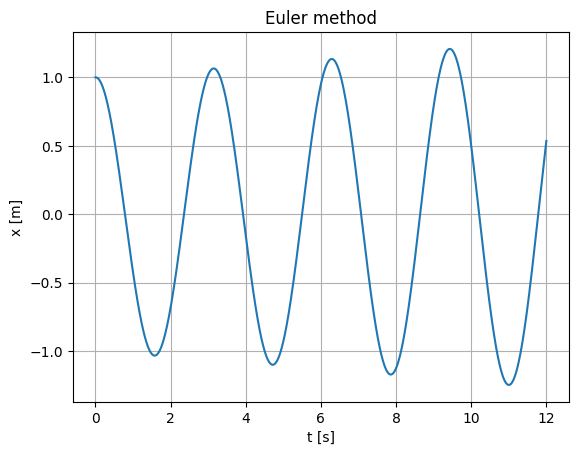

In [ ]:
plt.title("Euler method")
plt.grid()
plt.xlabel("t [s]")
plt.ylabel("x [m]")
plt.plot(t_list, x_list)

In [ ]:
"""
운동 에너지(kinetic energy)
"""
KE_e = 1/2 * m * np.array(v_list) ** 2


"""
탄성 퍼텐셜 에너지(elastic potential energy)
"""
PE_e = 1/2 * k * np.array(x_list) ** 2

"""
역학적 에너지(mechanical energy)
"""
ME_e = KE_e + PE_e

Text(0.5, 1.0, 'Euler method')

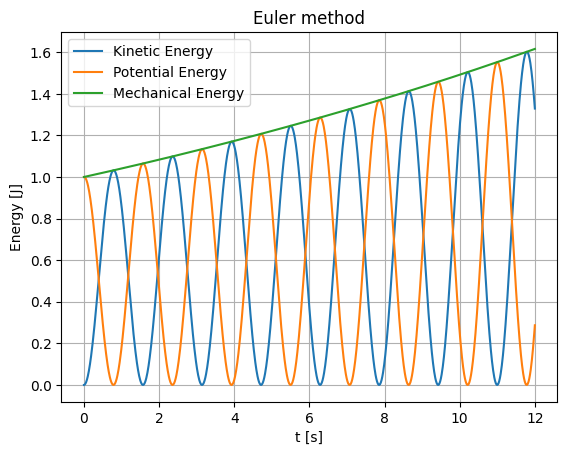

In [ ]:
plt.title("Euler method")
plt.grid()
plt.xlabel("t [s]")
plt.ylabel("Energy [J]")
plt.plot(t_list, KE_e, label="Kinetic Energy")
plt.plot(t_list, PE_e, label="Potential Energy")
plt.plot(t_list, ME_e, label="Mechanical Energy")
plt.legend()
plt.title("Euler method")

In [ ]:
rel_error_euler = (ME_e[-1] - ME_e[0]) / ME_e[0]
rel_error_euler

### i-a) 오일러-크로머 방법과 비교:

In [ ]:
"""
용수철에 매달린 물체의 운동: 오일러-크로머 방법
"""

v0 = 0.0
t0 = 0.0
x0 = 1.0
Delta_t = 0.1
k = 2
m = 0.5

t = t0
x = x0
v = v0
t_ec = [t]
x_ec = [x]
v_ec = [v]

for n in range(1, 121):
  t = t + Delta_t
  a = -k/m * x         # calculate a at each step
  v = v + a * Delta_t  # update v first
  x = x + v * Delta_t  # then update x with updated v

  t_ec.append(t)
  x_ec.append(x)
  v_ec.append(v)

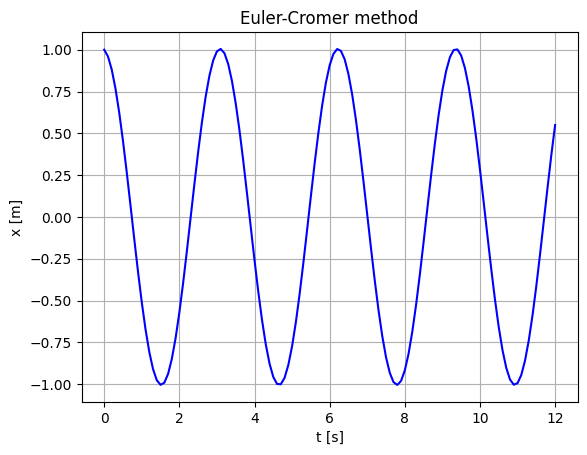

In [ ]:
plt.title("Euler-Cromer method")
plt.grid()
plt.xlabel("t [s]")
plt.ylabel("x [m]")
plt.plot(t_ec, x_ec, c='b')

In [ ]:
"""
운동 에너지(kinetic energy)
"""

KE_ec = 1/2 * m * np.array(v_ec) ** 2
"""
탄성 퍼텐셜 에너지(elastic potential energy)
"""

PE_ec = 1/2 * k * np.array(x_ec) ** 2
"""
역학적 에너지(mechanical energy)
"""

ME_ec = KE_ec + PE_ec

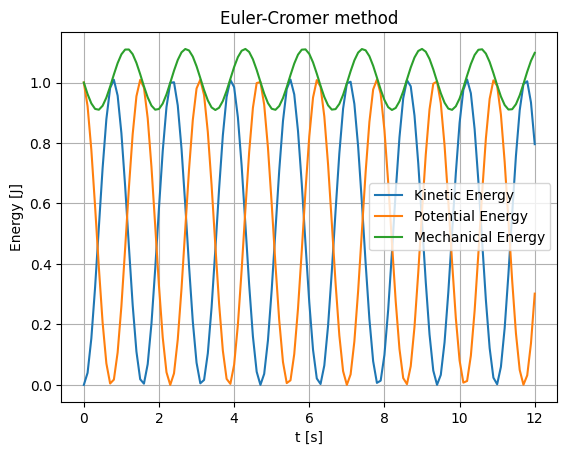

In [ ]:
plt.title("Euler-Cromer method")
plt.grid()
plt.xlabel("t [s]")
plt.ylabel("Energy [J]")
plt.plot(t_ec, KE_ec, label="Kinetic Energy")
plt.plot(t_ec, PE_ec, label="Potential Energy")
plt.plot(t_ec, ME_ec, label="Mechanical Energy")
plt.legend()

In [ ]:
rel_error_ec = (ME_ec[-1] - ME_ec[0]) / ME_ec[0]
rel_error_ec

0.09805129699502557


### ii) 중간점 방법

$k_1 = f(t_n, S_n)$ 이라 하고, 중간 상태를 계산하여

$$ S_\mathrm {mid} = S_n + k_1 \cdot \dfrac{\Delta t}{2} $$

라 한 다음, 중간점에서의 변화율

$$ k_2 = f(S_{\mathrm {mid}}) $$

를 구하여

$$ S_{n+1} = S_n + k_2 \cdot \Delta t $$
와 같이 다음 상태를 구한다.


앞의 등가속도 운동을 예로 들면 $ k_1 = f(x_n, v_n)=(v_n, a) $ 이고,

$$ \begin{align} S_{\mathrm{mid}} &= (x_n, v_n) + (v_n, a)\dfrac{\Delta t}{2}\\ &= (x_n+v_n\dfrac{\Delta t}{2}, v_n+a\dfrac{\Delta t}{2}), \end{align}$$

$$ k_2 = f(S_{\mathrm{mid}})=(v_n+a\dfrac{\Delta t}{2}, a)=(v_{\rm mid}, a), $$

$$\begin{align} S_{n+1}&=(x_{n+1}, v_{n+1})=S_{n} + k_2\Delta t\\
&=(x_n, v_n) + (v_{\rm mid}, a)\Delta t \\
&= (x_n+v_{\rm mid}\Delta t, v_n + a\Delta t)\end{align}$$임을 확인할 수 있다.

이를 용수철에 매달린 운동에 적용하면,

$ k_1 = f(x_n, v_n) = (v_n, -\dfrac{k}{m}x_n) $,

$ \begin{align}
S_{\rm mid} &= S_n + k_1 \dfrac{\Delta t}{2} \\
&= (x_n + v_n \dfrac{\Delta t}{2}, v_n - \dfrac{k}{m}x_n\dfrac{\Delta t}{2}) \\&
\equiv (x_{\rm mid}, v_{\rm mid}),
\end{align} $

$\begin{align} k_2 &= f(S_{\rm mid}) \\
&= f(S_n + k_1 \dfrac{\Delta t}{2}) \\
&= f(x_{\rm mid}, v_{\rm mid})\\
&= (v_{\rm mid}, -\dfrac{k}{m}x_{\rm mid}),\end{align}$

$ S_{n+1}= S_n + k_2 \Delta t $

이다.

In [ ]:
"""
용수철에 매달린 물체의 운동
Midpoint method
"""

v0 = 0.0; t0 = 0.0; x0 = 1.0;
Delta_t = 0.1; k = 2; m = 0.5

def f(t, S):
  """
  x와 v의 변화율을 구한다.
  """
  x, v = S
  k1 = np.array([v, -k/m*x])
  return k1

def mpstep(dSdt, t, S, Delta_t):
  """
  중간점 방법에 따라 다음 상태를 구한다.
  """
  k1 = dSdt(t, S)
  k2 = dSdt(t + Delta_t / 2, S + k1 * Delta_t / 2)
  S_next = S + k2 * Delta_t
  t_next = t + Delta_t
  return (t_next, S_next)

# 변수들을 초기화
t = t0; x = x0; v = v0;

# 초기값을 배열 첫번째 값으로 넣어준다
t_mp = np.array([t])
x_mp = np.array([x])
v_mp = np.array([v])
S = np.array([x, v])

for n in range(1, 121):
  t, S = mpstep(f, t, S, Delta_t)
  x, v = S

  t_mp = np.append(t_mp, t)
  x_mp = np.append(x_mp, x)
  v_mp = np.append(v_mp, v)

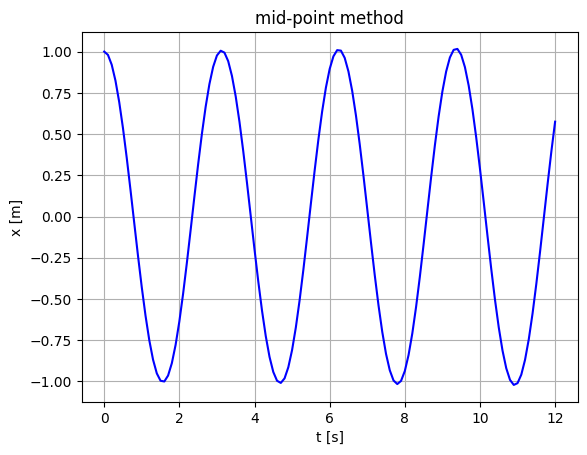

In [ ]:
plt.title("mid-point method")
plt.grid()
plt.xlabel("t [s]")
plt.ylabel("x [m]")
plt.plot(t_mp, x_mp, c='b')

In [ ]:
"""
운동 에너지(kinetic energy)
"""

KE_mp = 1/2 * m * v_mp ** 2
"""
탄성 퍼텐셜 에너지(elastic potential energy)
"""

PE_mp = 1/2 * k * x_mp ** 2
"""
역학적 에너지(mechanical energy)
"""

ME_mp = KE_mp + PE_mp

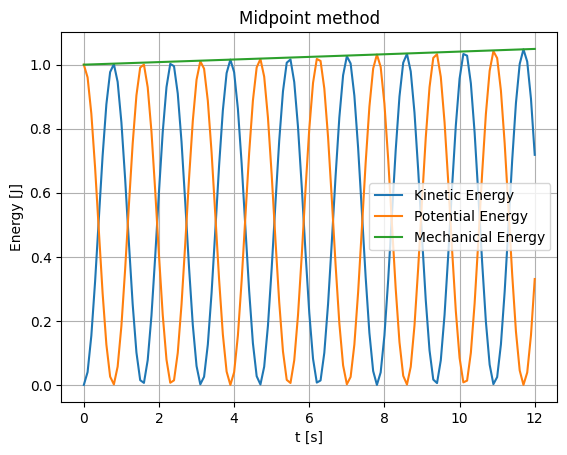

In [ ]:
plt.title("Midpoint method")
plt.grid()
plt.xlabel("t [s]")
plt.ylabel("Energy [J]")
plt.plot(t_mp, KE_mp, label="Kinetic Energy")
plt.plot(t_mp, PE_mp, label="Potential Energy")
plt.plot(t_mp, ME_mp, label="Mechanical Energy")
plt.legend()

In [ ]:
rel_error_mp = (ME_mp[-1] - ME_mp[0]) / ME_mp[0]
rel_error_mp

0.049160586019571184


### ii) 호인(Heun)의 방법

$k_1 = f(t_n, S_n)$ 이라 하고, 이 값을 바탕으로 다음 상태를 임시로 계산하여

$$ S_{n+1}^\prime = S_n + k_1 \cdot \Delta t $$

라 한 다음, $S_{n+1}^\prime$ 에서의 변화율

$$ k_2 = f(S_{n+1}^\prime) $$

를 구하여 최종적으로 $k_1$, $k_2$의 평균을 이용하여

$$ S_{n+1} = S_n + \frac{1}{2} (k_1 + k_2) \cdot \Delta t $$

와 같이 최종적으로 다음 상태를 구한다.

In [ ]:
"""
용수철에 매달린 물체의 운동
Heun's method
"""

v0 = 0.0; t0 = 0.0; x0 = 1.0;
Delta_t = 0.1; k = 2; m = 0.5

def f(t, S):
  """
  x와 v의 변화율을 구한다.
  """
  x, v = S
  k1 = np.array([v, -k/m*x])
  return k1

def Heun_step(dSdt, t, S, Delta_t):
  """
  호인(Heun)의 방법에 따라 다음 상태를 구한다.
  """
  k1 = dSdt(t, S)
  k2 = dSdt(t + Delta_t, S + k1 * Delta_t)
  S_next = S + (k1 + k2)/2 * Delta_t
  t_next = t + Delta_t
  return (t_next, S_next)

# 변수들을 초기화
t = t0; x = x0; v = v0;

# 초기값을 배열 첫번째 값으로 넣어준다
t_h = np.array([t])
x_h = np.array([x])
v_h = np.array([v])
S = np.array([x, v])

for n in range(1, 121):
  t, S = Heun_step(f, t, S, Delta_t)
  x, v = S

  t_h = np.append(t_h, t)
  x_h = np.append(x_h, x)
  v_h = np.append(v_h, v)

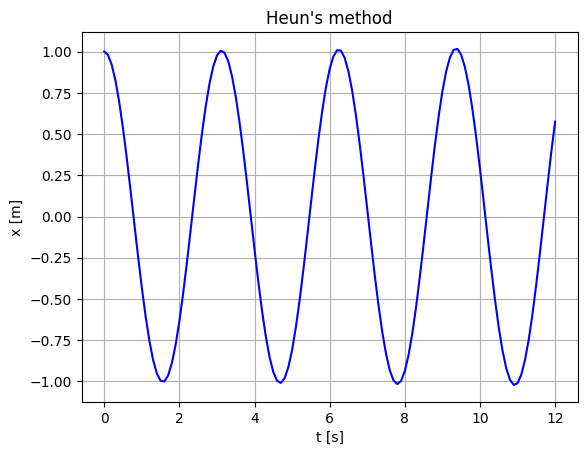

In [ ]:
plt.title("Heun's method")
plt.grid()
plt.xlabel("t [s]")
plt.ylabel("x [m]")
plt.plot(t_h, x_h, c='b')

In [ ]:
"""
운동 에너지(kinetic energy)
"""

KE_h = 1/2 * m * v_h ** 2
"""
탄성 퍼텐셜 에너지(elastic potential energy)
"""

PE_h = 1/2 * k * x_h ** 2
"""
역학적 에너지(mechanical energy)
"""

ME_h = KE_h + PE_h

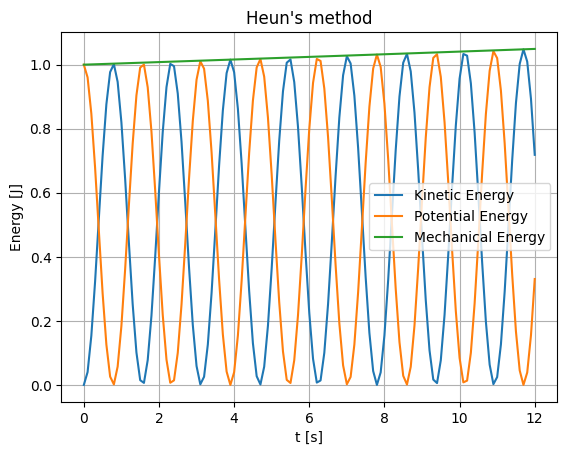

In [ ]:
plt.title("Heun's method")
plt.grid()
plt.xlabel("t [s]")
plt.ylabel("Energy [J]")
plt.plot(t_h, KE_h, label="Kinetic Energy")
plt.plot(t_h, PE_h, label="Potential Energy")
plt.plot(t_h, ME_h, label="Mechanical Energy")
plt.legend()

In [ ]:
rel_error_h = (ME_h[-1] - ME_h[0]) / ME_h[0]
rel_error_h

0.04916058601956985